# **💡 상품가입고객 예측 및 타겟 마케팅**  

---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 상품가입고객 예측 및 타겟 마케팅
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 Classification(분류) 예측
```

> **학습목표**

```
▶ 데이터를 Read하고 전처리할 수 있는 역량 습득
▶ Classification(분류) 예측 문제에 대한 개념 이해
▶ Classification(분류) 예측 모델링 프로세스 및 코드 이해
```


## **문제상황 Introduction**
---
> **시나리오** 📞🏦

```
최근 주식, 코인 투자가 열풍이 불면서 A은행의 정기예금 가입자가 감소하고 있다. 정기예금 가입률이 높았을 때는 Mass 마케팅 형식으로 홍보를  
해도 투자 대비 효율이 좋았지만 현재는 가입률이 떨어지고 있기 때문에 마케팅 비용 투자 대비 효율이 감소하고 있는 상황이다. 마케팅 비용을  
줄이기 위해 정기예금 가입 가능성이 높은 고객군을 추출하고 타겟 마케팅을 수행하고자 한다.
```  

> **문제정의**

```
▶ 정기예금 가입자 감소, 마케팅 비용 투자 대비 효율 저조
```  

> **기대효과**

```
▶ 정기예금 가입률 증가, 마케팅 비용 투자 대비 효율 증대
```

> **해결방안**

```
▶ 정기예금 가입 가능성이 높은 타겟 고객군 추출 및 대상 마케팅
```

> **성과측정**  

```
▶ 대조군 대비 타겟 고객군 정기예금 가입률
```

> **운영**  

```
▶ 매 월 Data mart 생성 후 Model을 활용하여 타겟 고객군 추출
▶ 마케팅 후 대조군과 비교를 통해 마케팅 효과 모니터링
```

> **데이터 살펴보기**

* 고객마다 과거 진행한 캠페인(마케팅)에 대한 이력과, 현재 캠페인에서 수행된 데이터가 존재
* duration은 예측시 제외 (※ 통화 시간에 따라 Y(가입여부) 결정되므로 제외)
* 데이터 명세 ⬇

|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|나이|직업|결혼|교육|신용카드|주택|대출|연락처|마지막 연락 월|마지막 연락 요일|통화시간|캠페인 기간동안 고객연락횟수|이전 캠페인 연락 후 지난일|  

|previous|poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr,employed|y|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|현재 캠페인 전에 연락횟수|이전 마케팅 결과|고용 변동률|소비자 물가 지수|소비자 신뢰 지수|유리보 3개월 비율|직원수|정기예금 가입여부|

In [2]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data read
import pandas as pd
df = pd.read_csv('../data/S_PJT03_DATA.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **🔈Process01**  
**┗ 고객 프로필 조건에 따른 가입률 비교**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [4]:
#  Data 형태 확인
#  41,188  row, 21 col로 구성됨
df.shape

(41188, 21)

In [5]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#  Null 값 확인
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
#  Outlier 확인, 음수값 확인
pd.DataFrame(df.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [9]:
# 평균 정기예금 가입률 11%
4640 / (36548+4640)

0.11265417111780131

### · Categorical(범주형) 변수 파악
---
* Categorical(범주형) 변수의 현황을 파악한다.

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
df['age'].dtype

dtype('int64')

In [12]:
df['job'].dtype

dtype('O')

In [13]:
#  numerical, categorical data 나누기
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtype == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("numerical_list :", numerical_list)
print("categorical_list :", categorical_list)

numerical_list : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_list : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [14]:
print(numerical_list)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [15]:
print(categorical_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


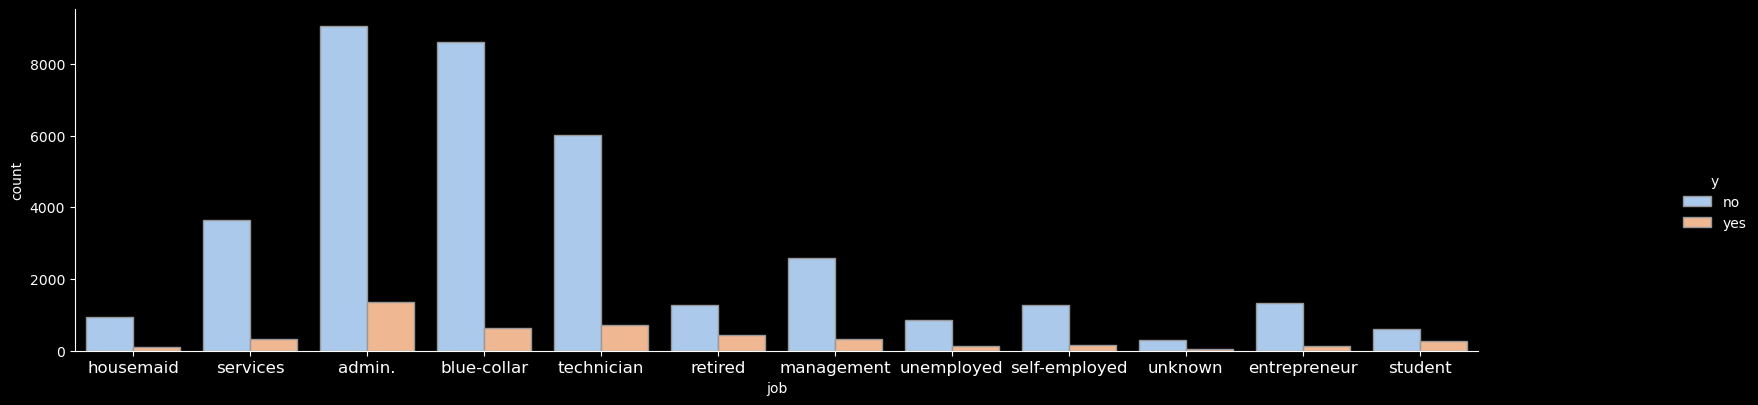

In [16]:
# example
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
sns.catplot(x="job", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 4);
plt.xticks(fontsize=12);

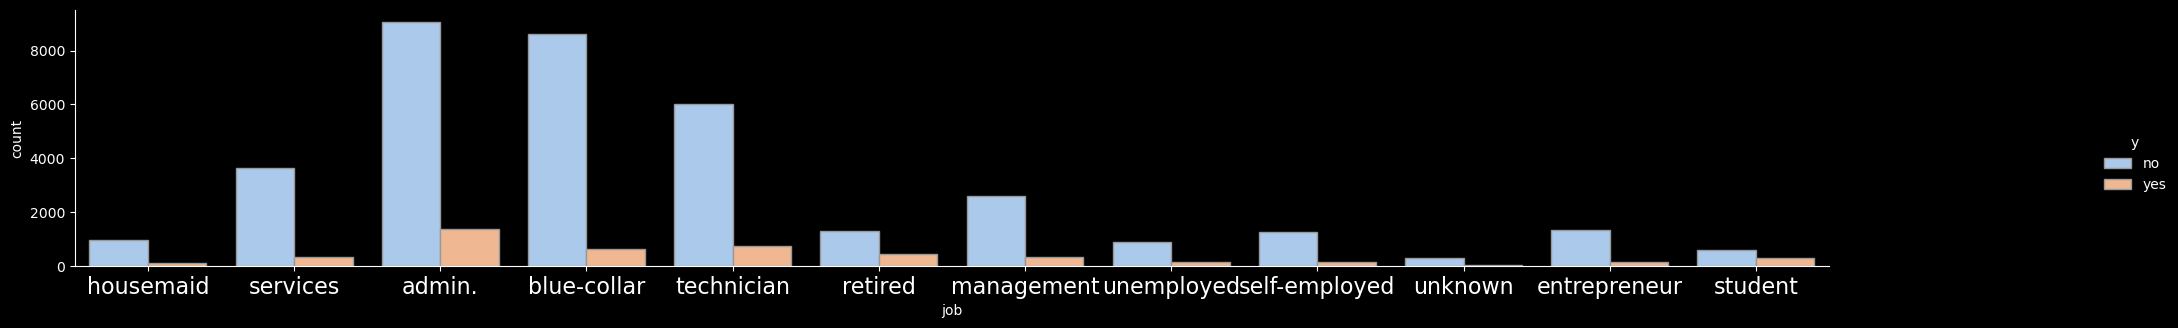

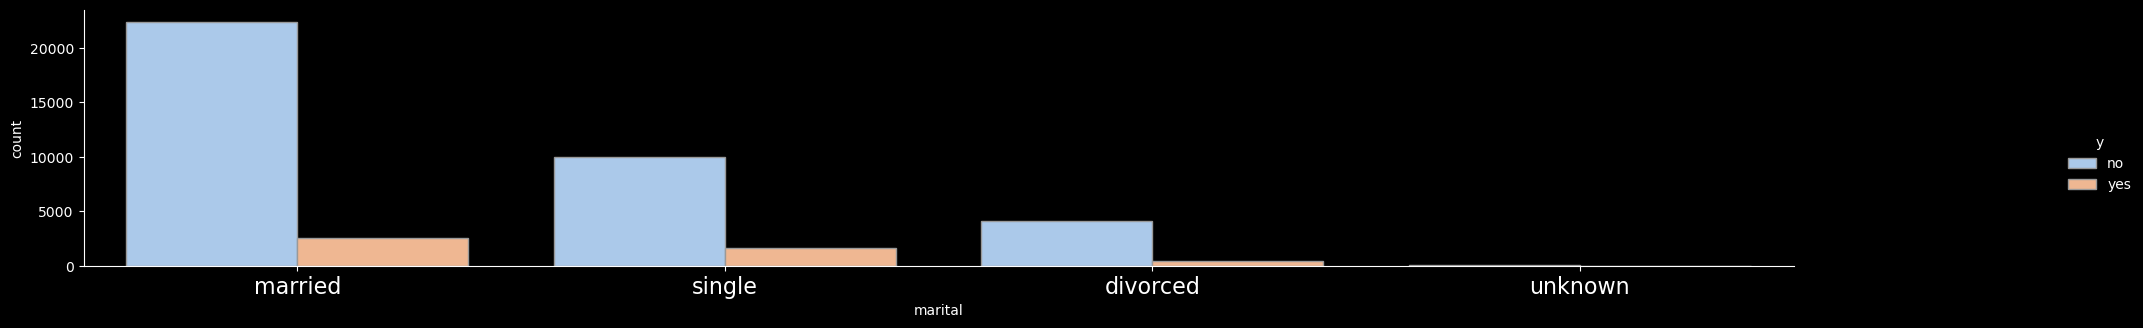

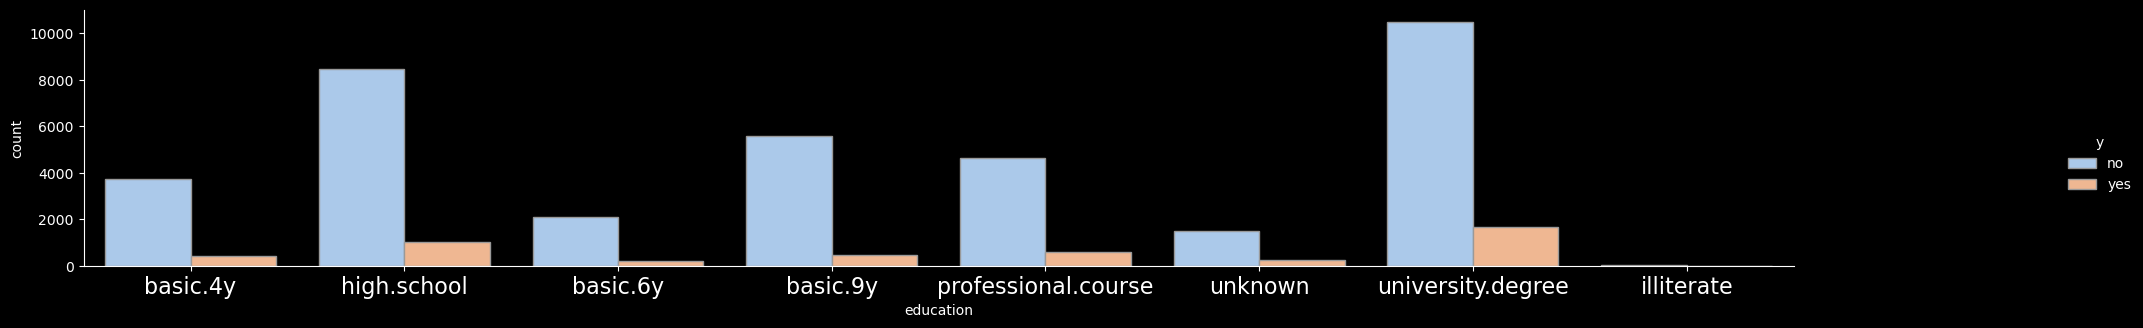

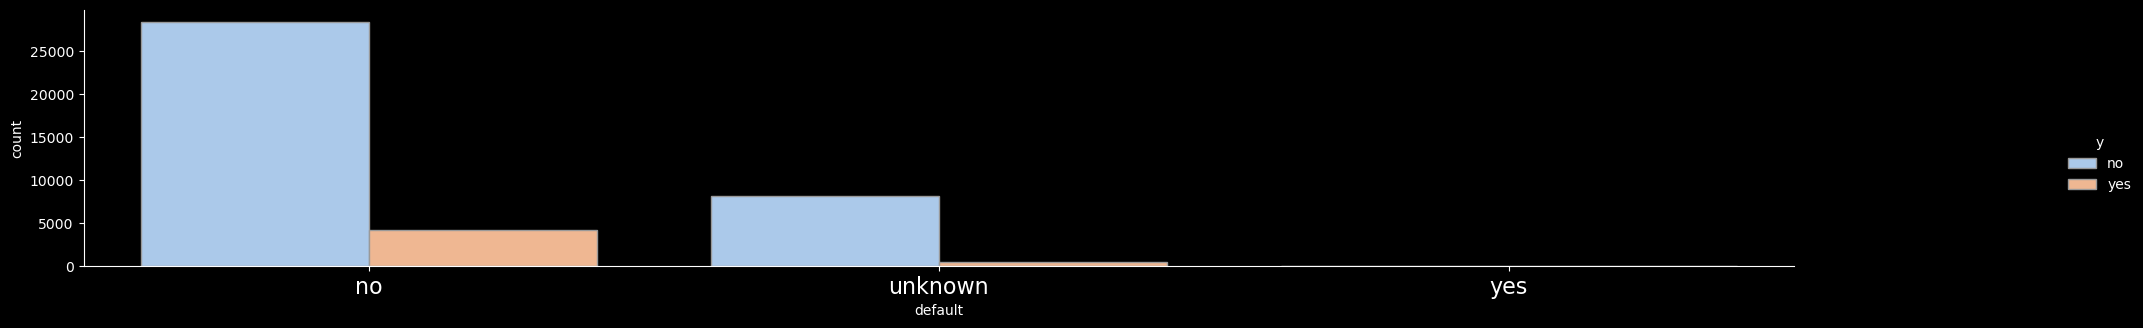

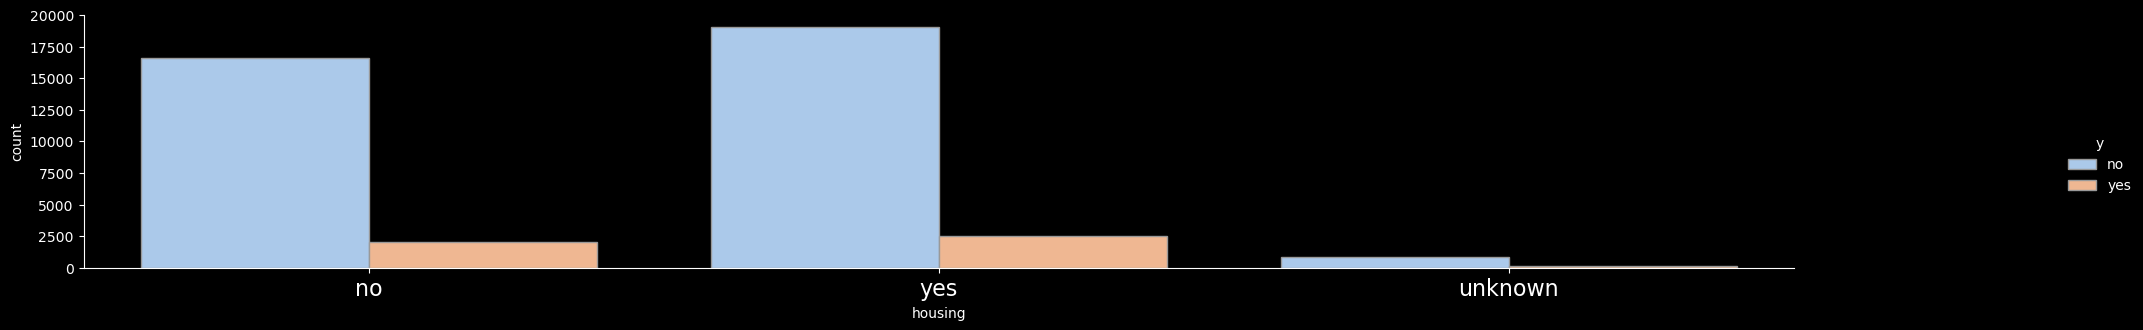

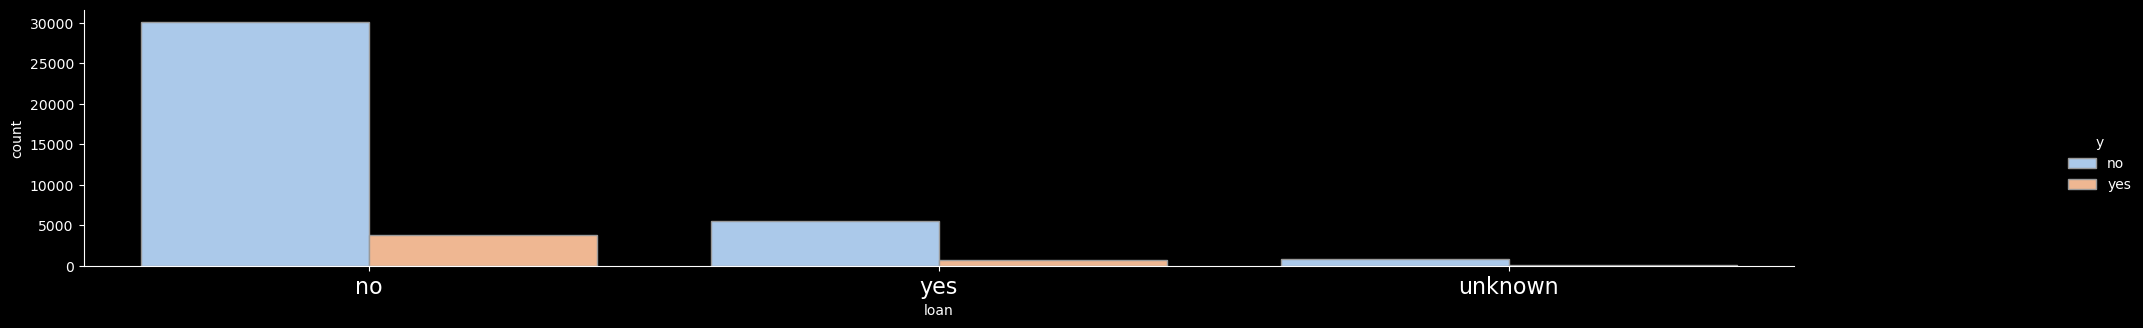

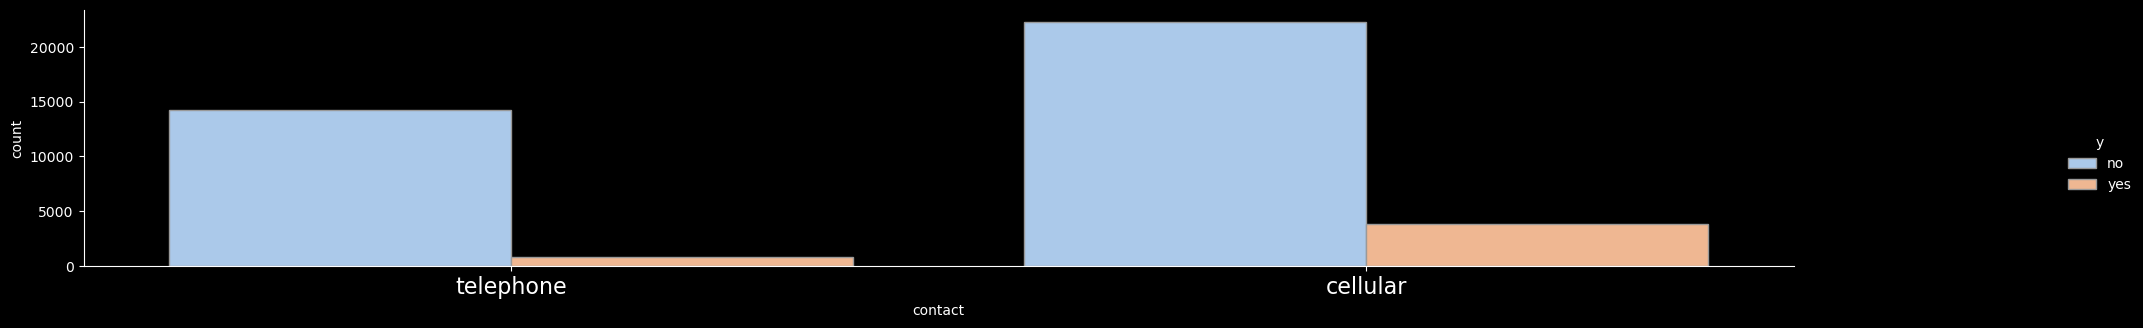

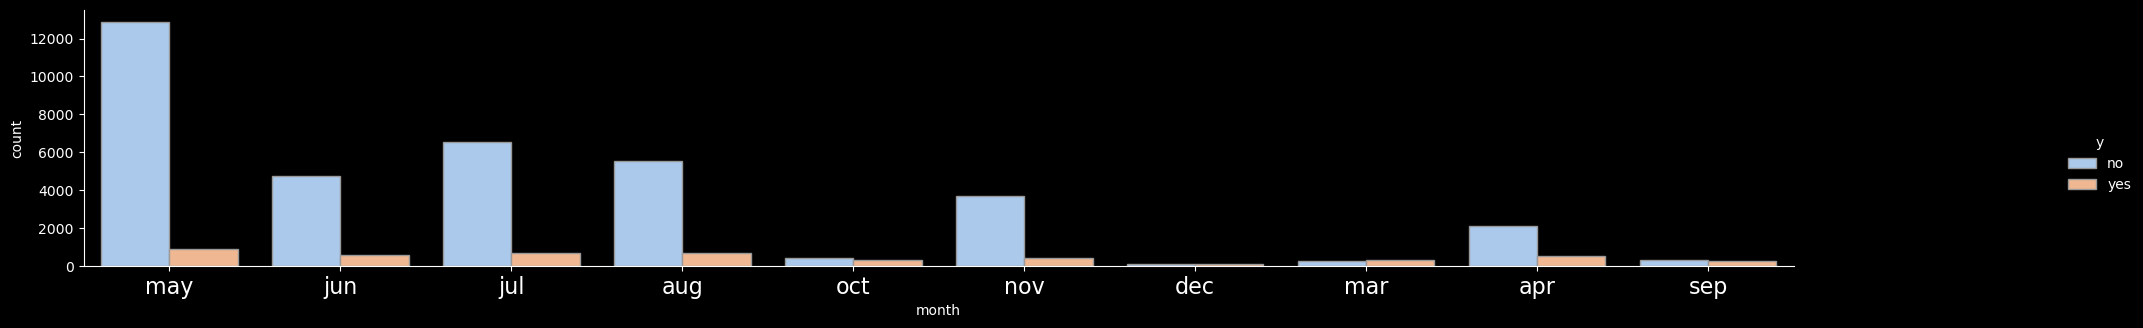

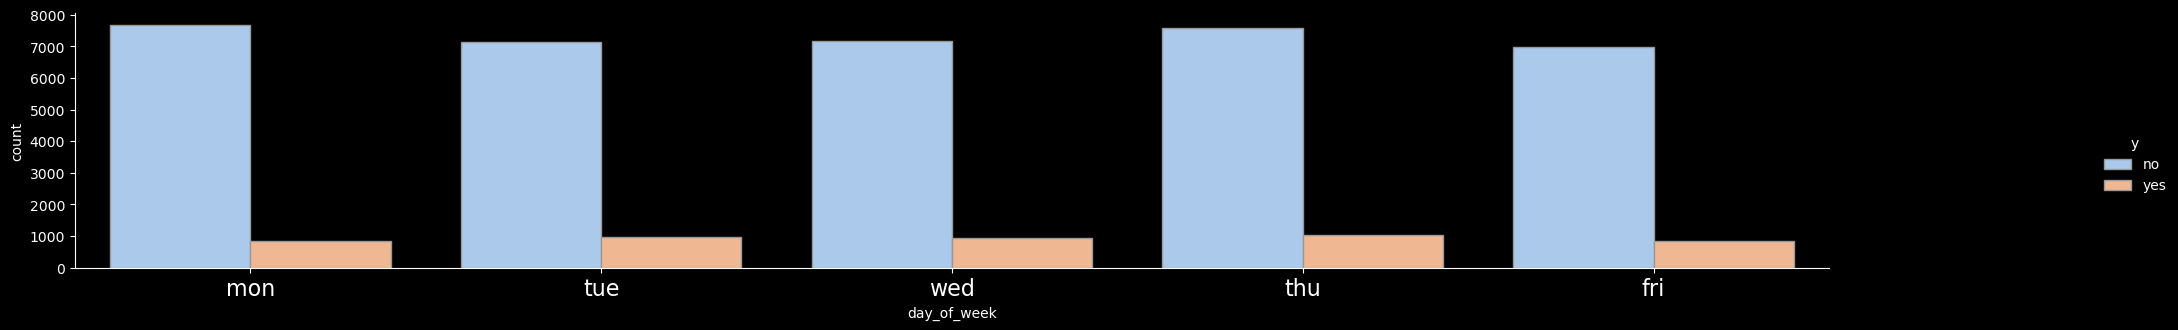

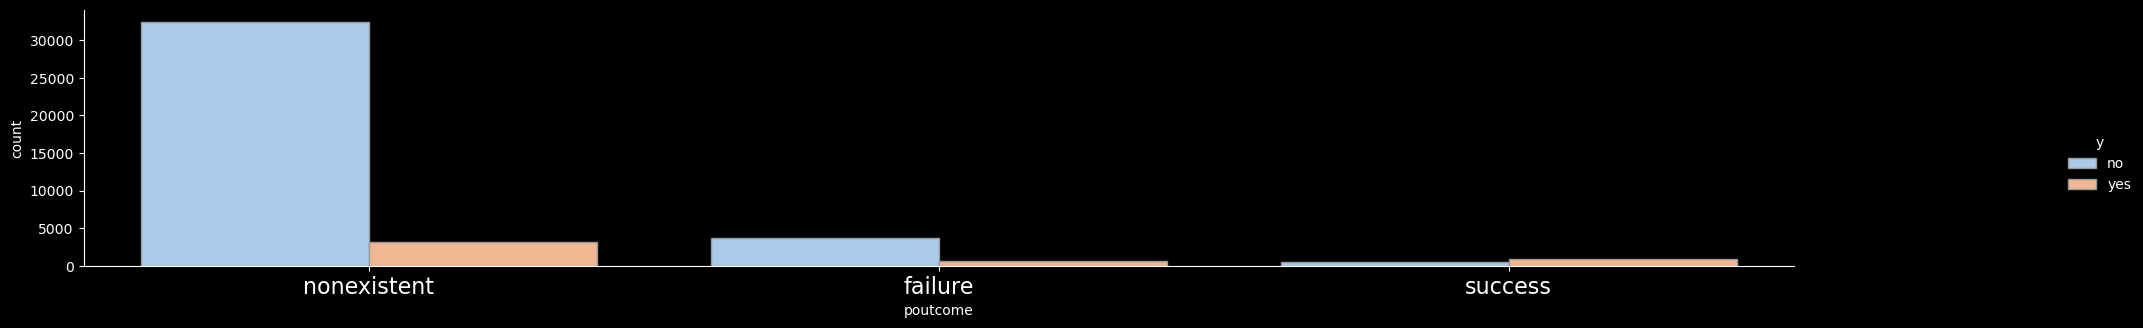

In [16]:
#  catplot을 활용하여 Categorical 변수의 구성형태와 정기예금 가입 상황을 한눈에 살펴봄
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="job", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="marital", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="education", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="default", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="housing", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="loan", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="contact", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="month", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="day_of_week", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="poutcome", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)


## **🔉Process02**  
**┗ Rule base 기반 상품 가입 예측**  
---
* 현업에서 경험적 지식에서 얻을 수 있는 노하우 기반
* "이런 사람들의 가입률이 높겠구나" 하는 노하우, 데이터로 검증 후 적용

### · 고객 프로필 - 가입률 비교
---

In [17]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
import numpy as np
df['y'] = np.where(df['y']=='yes', 1, 0)
df_job = df.groupby('job')['y'].agg(['count', 'sum'])
df_job['ratio'] = round((df_job['sum'] / df_job['count'])*100, 2)
df_job.sort_values(by=['ratio'], ascending = False)

,count,sum,ratio
job,,,
student,875,275,31.43
retired,1720,434,25.23
unemployed,1014,144,14.20
admin.,10422,1352,12.97
management,2924,328,11.22
unknown,330,37,11.21
technician,6743,730,10.83
self-employed,1421,149,10.49
housemaid,1060,106,10.00


In [25]:
#  고객 Job(직업)에 따른 정기예금 가입률 비교
df_job=pd.DataFrame(df['y'].groupby(df['job']).value_counts())
df_job.columns=['cnt']
df_job=df_job.reset_index()
df_job.head(5)

,job,y,cnt
0,admin.,0,9070
1,admin.,1,1352
2,blue-collar,0,8616
3,blue-collar,1,638
4,entrepreneur,0,1332


In [26]:
#  pivot table을 활용하여 하나의 row로 변환
df_job = pd.pivot_table(df_job,        # 피벗할 데이터프레임
                     index = 'job',    # 행 위치에 들어갈 열
                     columns = 'y',    # 열 위치에 들어갈 열
                     values = 'cnt')   # 데이터로 사용할 열
df_job = df_job.reset_index()
df_job.head(5)

y,job,0,1
0,admin.,9070,1352
1,blue-collar,8616,638
2,entrepreneur,1332,124
3,housemaid,954,106
4,management,2596,328


In [27]:
df_job.rename(columns={0:'no',1:'yes'},inplace=True)

In [29]:
#  가입률(sign_ratio)
df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)
df_job.sort_values(by=['sign_ratio'], ascending =False)

y,job,no,yes,sign_ratio
8,student,600,275,31.4
5,retired,1286,434,25.2
10,unemployed,870,144,14.2
0,admin.,9070,1352,13.0
4,management,2596,328,11.2
11,unknown,293,37,11.2
9,technician,6013,730,10.8
6,self-employed,1272,149,10.5
3,housemaid,954,106,10.0
2,entrepreneur,1332,124,8.5


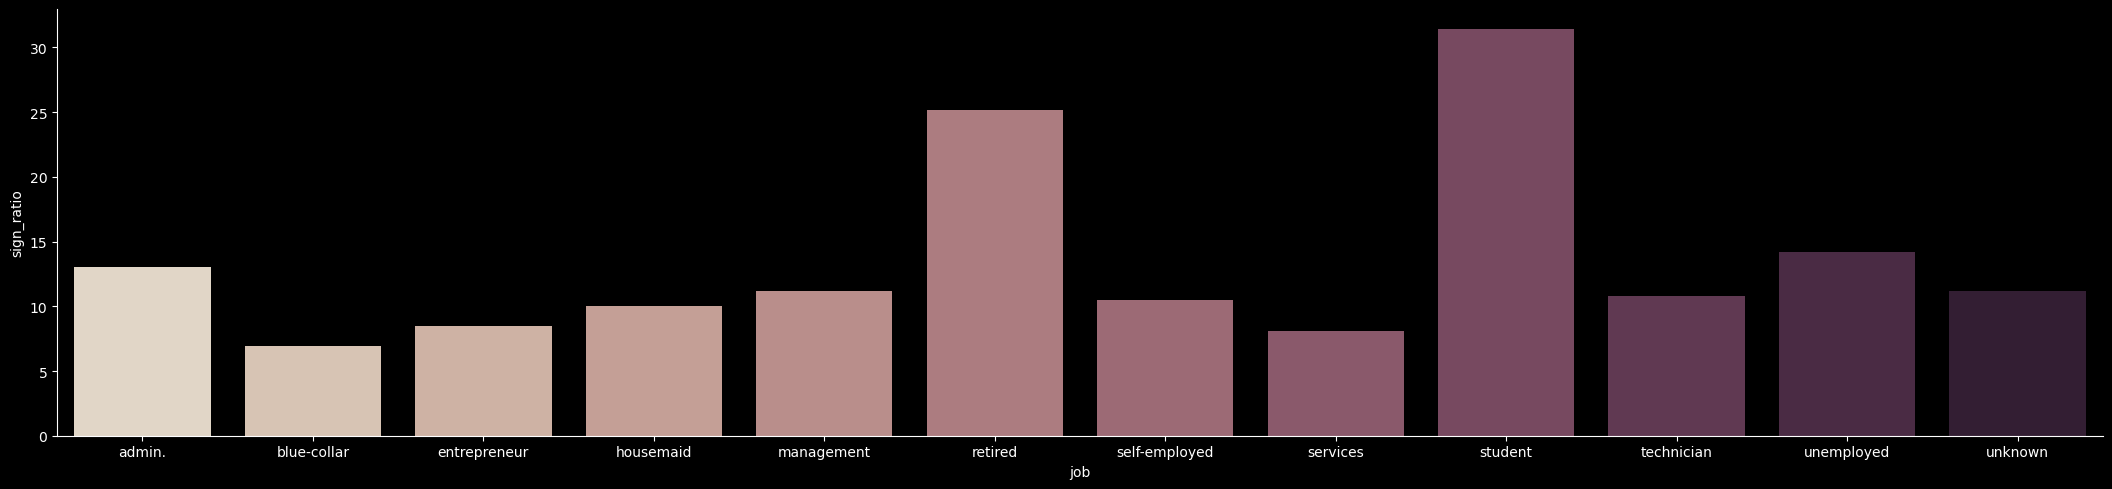

In [ ]:
#  Student(학생)의 가입률이 가장 높고, 뒤이어 은퇴 고객의 가입률이 높음 (※ 평균가입률 11%)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="job", y="sign_ratio", kind='bar', palette="ch:.25", data=df_job);
plt.rc('xtick', labelsize=10)
plt.gcf().set_size_inches(25, 5)

In [30]:
i = 'poutcome'

# 1단계
df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

# 2단계
df_gp = pd.pivot_table(df_gp,              # 피벗할 데이터프레임
                        index = i,         # 행 위치에 들어갈 열
                        columns = 'y',     # 열 위치에 들어갈 열
                        values = 'cnt')    # 데이터로 사용할 열
df_gp.rename(columns={0:'no'},inplace=True)
df_gp.rename(columns={1:'yes'},inplace=True)

In [31]:
# 3단계
df_gp = df_gp.reset_index()

# 4단계
df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,poutcome,no,yes,sign_ratio
2,success,479,894,65.1
0,failure,3647,605,14.2
1,nonexistent,32422,3141,8.8


In [32]:
# Categorical(범주형) 변수에 대해서 가입률 비교를 모두 진행
categorical_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [33]:
#  'y'는 예측 값이기 때문에 list에서 삭제
categorical_list.remove('y')

In [34]:
#  Categorical(범주형) 변수에 대해서 가입률 비교를 모두 진행
#  Feature별 가입률이 가장 높은 Row에 대해서만 출력

for i in categorical_list :
  # 1단계
  df_job=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
  df_job.columns=['cnt']
  df_job=df_job.reset_index()

  # 2단계
  df_job = pd.pivot_table(df_job,        # 피벗할 데이터프레임
                      index = i,         # 행 위치에 들어갈 열
                      columns = 'y',     # 열 위치에 들어갈 열
                      values = 'cnt')    # 데이터로 사용할 열
  df_job.rename(columns={0:'no'},inplace=True)
  df_job.rename(columns={1:'yes'},inplace=True)

  # 3단계
  df_job = df_job.reset_index()

  # 4단계
  df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)

  df_job=df_job.sort_values(by=['sign_ratio'], ascending=False)

  print(df_job.iloc[0:1,:])
  print('')

y      job   no  yes  sign_ratio
8  student  600  275        31.4

y  marital  no  yes  sign_ratio
3  unknown  68   12        15.0

y   education  no  yes  sign_ratio
4  illiterate  14    4        22.2

y default       no     yes  sign_ratio
0      no  28391.0  4197.0        12.9

y housing     no   yes  sign_ratio
2     yes  19069  2507        11.6

y loan     no   yes  sign_ratio
0   no  30100  3850        11.3

y   contact     no   yes  sign_ratio
0  cellular  22291  3853        14.7

y month   no  yes  sign_ratio
5   mar  270  276        50.5

y day_of_week    no   yes  sign_ratio
2         thu  7578  1045        12.1

y poutcome   no  yes  sign_ratio
2  success  479  894        65.1



### · Rule base 가입률
---

In [35]:
#  상위에서 평균 가입률(11%) 대비 높았던 조건을 OR조건으로 새로운 Rule(규칙)을 정의

df_rule = df[ (df['job'] == 'student') |
# (df['marital'] == 'unknown') |
# (df['education'] == 'illiterate') |
# (df['default'] == 'no') |
# (df['housing'] == 'yes') |
# (df['loan'] == 'no') |
(df['contact'] == 'cellular') |
(df['month'] == 'mar') |
(df['day_of_week'] == 'thu') |
(df['poutcome'] == 'success') ]

In [36]:
df_rule['y'].value_counts()

y
0    25143
1     4091
Name: count, dtype: int64

In [ ]:
df_rule['y'].value_counts()

y
0    25143
1     4091
Name: count, dtype: int64

In [37]:
# ▶ Rule에 의한 타겟 고객군을 추출 했을 때 평균 14% 가입률을 보임
4091 / (4091 + 25143)

0.1399397961277964

## **🔊Process03**  
**┗ ML 활용 상품 가입 예측**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [38]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [39]:
# Train/Test data에는 문자(str)형태로 이루어진 데이터를 Input 할 수 없음
# Model에서 이해할 수 있는 1, 0으로 Target Data를 변경
import numpy as np
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [40]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [41]:
#  모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['duration','y'], axis=1)
Y=df['y']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(28831, 19)
(28831,)
(12357, 19)
(12357,)


In [42]:
print(categorical_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [43]:
for i in categorical_list :
  print(i, df[i].nunique())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3


In [44]:
#  Categorical(범주형) 변수는 One-hot-encoding or Label-encoding을 통해 숫자형 변수로 변경해야함
#  One-hot-encoding은 차원이 많은 변수에는 불리, Label-encoding은 회귀관련 알고리즘에서는 사용 어려움.(※Tree 계열 알고리즘에서는 사용 가능)
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

x_train[categorical_list].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
1934,7,1,3,0,2,0,1,6,0,1
25201,2,1,6,1,2,2,0,7,3,1
32841,0,1,3,0,2,2,0,6,1,1
26890,9,1,5,0,0,0,0,7,2,1
10883,0,1,3,0,0,2,1,4,4,1


In [45]:
x_train[categorical_list]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
1934,7,1,3,0,2,0,1,6,0,1
25201,2,1,6,1,2,2,0,7,3,1
32841,0,1,3,0,2,2,0,6,1,1
26890,9,1,5,0,0,0,0,7,2,1
10883,0,1,3,0,0,2,1,4,4,1
...,...,...,...,...,...,...,...,...,...,...
15698,0,1,3,0,2,2,0,3,1,1
29373,6,1,6,0,0,0,0,0,0,1
39576,8,2,7,0,2,0,0,6,3,2
13982,1,0,2,0,2,0,0,3,0,1


In [46]:
x_test[categorical_list]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
18936,11,1,7,0,0,0,0,1,1,1
9412,9,0,0,0,2,0,1,4,0,1
11291,5,1,5,0,2,0,1,4,2,1
2826,1,1,2,0,2,0,1,6,4,1
12920,1,1,2,0,0,2,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...
7823,7,2,0,0,0,0,1,4,1,1
15984,7,1,3,0,2,0,1,3,3,1
1617,1,1,3,0,0,0,1,6,0,1
37274,9,1,5,0,0,0,0,1,1,0


### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [47]:
#  학습
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(x_train, y_train)

#  예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25583
           1       0.99      0.97      0.98      3248

    accuracy                           1.00     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       1.00      1.00      1.00     28831

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10965
           1       0.57      0.31      0.40      1392

    accuracy                           0.90     12357
   macro avg       0.74      0.64      0.67     12357
weighted avg       0.88      0.90      0.88     12357



In [48]:
pd.Series(y_pred_train).value_counts()

0    25662
1     3169
Name: count, dtype: int64

### · Hyper parameter 튜닝
---
* 모델 성능을 올리기 위한 옵션 조절

In [49]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400],
           'max_depth' : [6, 8, 10]
            }

#  RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 12345, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='precision')
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'n_estimators': 400}
최고 예측 정확도: 0.6909


In [50]:
#  Best score 기준 재학습
rfc = RandomForestClassifier(n_estimators=400, max_depth=6, random_state = 123456)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25583
           1       0.74      0.20      0.32      3248

    accuracy                           0.90     28831
   macro avg       0.82      0.60      0.63     28831
weighted avg       0.89      0.90      0.88     28831

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.71      0.19      0.31      1392

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.63     12357
weighted avg       0.88      0.90      0.87     12357



In [51]:
pd.Series(y_pred_test).value_counts()

0    11975
1      382
Name: count, dtype: int64

### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

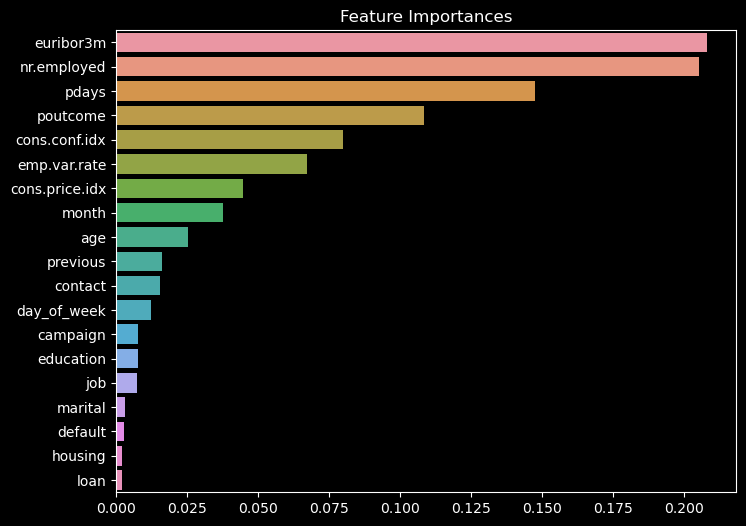

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

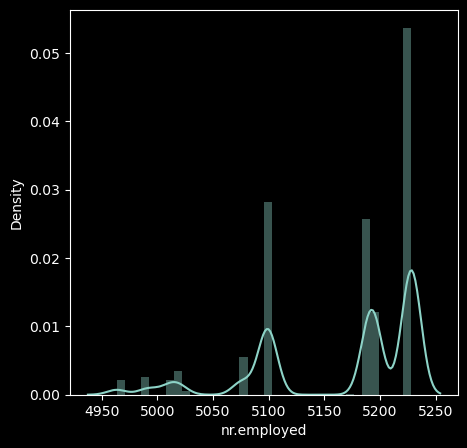

In [53]:
#  1위 변수 탐색
sns.distplot(df['nr.employed']);
plt.gcf().set_size_inches(5 ,5)

In [54]:
#  구간화
import numpy as np
df['nr.employed_gp'] = np.where (df['nr.employed'] <= 5000, '5000 이하',
                           np.where(df['nr.employed'] <= 5200, '5000~5200', '5200 초과'))

# ▶ 평가
df_gp = df.groupby('nr.employed_gp')['y'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
nr.employed_gp,,,
5000 이하,1408,704,50.0
5000~5200,23546,3070,13.0
5200 초과,16234,866,5.3


### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [55]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfc)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)